In [97]:
import numpy as np
import matplotlib.pyplot as plt

## 生成数据

In [98]:
error = np.random.normal(loc=0,scale=1,size=50)

In [99]:
x = np.linspace(start=0,stop=10,num=50,endpoint=True)
y = np.linspace(-50,0,50,endpoint=True)

In [100]:
# y_1 = -2*x + error - 20
#

In [101]:
# y_2 = -2*x + error

In [102]:
y_1 = -3*x  - 20

In [103]:
y_2 = -2*x

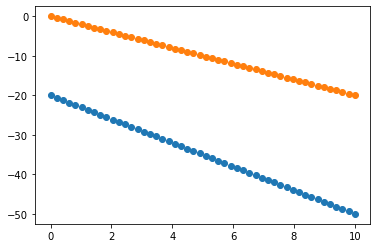

In [104]:
plt.scatter(x,y_1)
plt.scatter(x,y_2)
plt.show()


In [106]:
data_1 = np.vstack([x,y_1,np.ones(50)]).T
data_2 = np.vstack([x,y_2,np.zeros(50)]).T

In [107]:
data = np.vstack([data_1,data_2])


In [108]:
d = data[:,0:2]
labels = data[:,-1]

In [109]:
class_label = np.unique(labels)


In [110]:
S_w = np.zeros(shape=(d.shape[1],d.shape[1]))
for label in class_label:
    temp = d[labels == label]
    standard = temp - temp.mean(axis=0)
    s_w = standard.T.dot(standard)
    S_w += s_w

In [111]:
S_w

array([[  867.34693878, -2168.36734694],
       [-2168.36734694,  5637.75510204]])

In [112]:
S_b = np.zeros(shape=(d.shape[1],d.shape[1]))

In [113]:
aver_all = d.mean(axis=0)
for label in class_label:
    temp = d[labels==label]
    s_b = temp.shape[0]*(temp.mean(axis=0) - aver_all).T.dot(temp.mean(axis=0) - aver_all)
    S_b +=s_b

In [114]:
S_b

array([[15625., 15625.],
       [15625., 15625.]])

In [115]:
S_w

array([[  867.34693878, -2168.36734694],
       [-2168.36734694,  5637.75510204]])

In [116]:
np.linalg.inv(S_w)

array([[0.02997647, 0.01152941],
       [0.01152941, 0.00461176]])

In [117]:
eigenvalue, eigenvector = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

In [118]:
eigenvalue

array([900.73529412,   0.        ])

In [119]:
rel = list(zip(abs(eigenvalue), eigenvector.T))
rel.sort(key=lambda eig: eig[0], reverse=True)

In [120]:
rel

[(900.7352941176534, array([0.93200467, 0.36244626])),
 (0.0, array([-0.70710678,  0.70710678]))]

In [121]:
trans_matrix = np.concatenate([rel[i][1] for i in range(1)]).reshape((-1, 1),order='F')

In [122]:
trans_matrix

array([[0.93200467],
       [0.36244626]])

In [123]:
m = trans_matrix.T.dot(d.T)

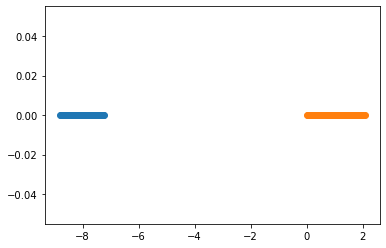

In [124]:
plt.scatter(m[:,0:50],np.zeros(50))
plt.scatter(m[:,50:100],np.zeros(50))

In [125]:
m[:,:51].shape

(1, 51)

In [126]:
trans_matrix

array([[0.93200467],
       [0.36244626]])

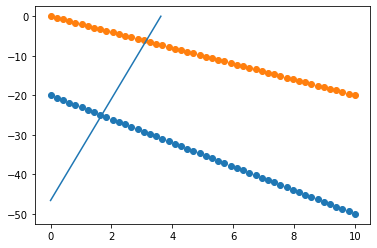

In [127]:
xxx = trans_matrix[1]*x
yyy = trans_matrix[0]*y
plt.scatter(x,y_1)
plt.scatter(x,y_2)
plt.plot(xxx,yyy)
plt.show()
